### import necessary libraries

In [42]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
# from malayalam_stemmer import malayalam_stemmer
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer
import sentencepiece

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adhua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")

In [3]:
sentence = "എനിക്ക് മലയാളം പഠിക്കാന്‍ ഇഷ്ടം ഉണ്ട്"
tokens = tokenizer.tokenize(sentence)
print(tokens)

['▁എ', 'ന', 'ക', 'ക', '▁മലയ', 'ള', '▁പഠ', 'ക', 'കന', '▁ഇഷ', 'ട', '▁ഉ', 'ണ', 'ട']


### Reading comments file

In [134]:
# Read the toxic comments file
toxic_comments_df = pd.read_excel("D:/dinsha/corpusnew.xlsx")

In [135]:
# corpusnew dataset contains comments and comment_length which are not arranged properly.
#changed the data into more meaningfull 
df = pd.read_excel("D:/dinsha/corpusnew (1).xlsx")
df

,comment,comment_length,word_count
0,ഒരു മാതിരി സാഡിസ്റ് മനോഭാവം,1.0,NaN
1,രാജ്യദ്രോഹികളെ വധിക്കേണ്ടതില്ലേ? അതുമായി മുന്...,1.0,NaN
2,കാൽനടയാത്രക്കാരനെ ഭയപ്പെടുത്താൻ കാറിന്റെ ജനാലക...,1.0,NaN
3,ഈ മനുഷ്യൻ യഥാർത്ഥത്തിൽ എന്തൊരു ചിറ്റ് മനുഷ്യൻ ...,2.0,NaN
4,നമ്മുടെ കോപ്പിലെ നിയമം അടിപൊളി ആണ് അപ്പോ ഇങ്ങ...,2.0,NaN
...,...,...,...
255,ഈ മുഖ്യമന്ത്രി കളളൻ ആണ്,1.0,NaN
256,മൊത്തം അഹങ്കാരി,1.0,NaN
257,അഹങ്കാരത്തിന് മൂക്കും കണ്ണും വെച്ചത്,1.0,NaN
258,വൃത്തി കേട്ട നാട്,1.0,NaN


In [136]:
df = df.drop('word_count', axis = 1) #Dropping word_count which has no values given.

In [137]:
df.dropna(inplace=True)

In [138]:
print(df.keys)

<bound method NDFrame.keys of                                                comment  comment_length
0                         ഒരു മാതിരി സാഡിസ്റ്  മനോഭാവം             1.0
1    രാജ്യദ്രോഹികളെ വധിക്കേണ്ടതില്ലേ?  അതുമായി മുന്...             1.0
2    കാൽനടയാത്രക്കാരനെ ഭയപ്പെടുത്താൻ കാറിന്റെ ജനാലക...             1.0
3    ഈ മനുഷ്യൻ യഥാർത്ഥത്തിൽ എന്തൊരു ചിറ്റ് മനുഷ്യൻ ...             2.0
4    നമ്മുടെ കോപ്പിലെ നിയമം  അടിപൊളി ആണ് അപ്പോ ഇങ്ങ...             2.0
..                                                 ...             ...
255                            ഈ മുഖ്യമന്ത്രി കളളൻ ആണ്             1.0
256                                    മൊത്തം അഹങ്കാരി             1.0
257               അഹങ്കാരത്തിന് മൂക്കും കണ്ണും വെച്ചത്             1.0
258                                  വൃത്തി കേട്ട നാട്             1.0
259                                       ലോക വിവരദോഷി             1.0

[260 rows x 2 columns]>


In [139]:
df = df[df['comment'].apply(lambda x: x.strip()) != '']

In [140]:
df

,comment,comment_length
0,ഒരു മാതിരി സാഡിസ്റ് മനോഭാവം,1.0
1,രാജ്യദ്രോഹികളെ വധിക്കേണ്ടതില്ലേ? അതുമായി മുന്...,1.0
2,കാൽനടയാത്രക്കാരനെ ഭയപ്പെടുത്താൻ കാറിന്റെ ജനാലക...,1.0
3,ഈ മനുഷ്യൻ യഥാർത്ഥത്തിൽ എന്തൊരു ചിറ്റ് മനുഷ്യൻ ...,2.0
4,നമ്മുടെ കോപ്പിലെ നിയമം അടിപൊളി ആണ് അപ്പോ ഇങ്ങ...,2.0
...,...,...
255,ഈ മുഖ്യമന്ത്രി കളളൻ ആണ്,1.0
256,മൊത്തം അഹങ്കാരി,1.0
257,അഹങ്കാരത്തിന് മൂക്കും കണ്ണും വെച്ചത്,1.0
258,വൃത്തി കേട്ട നാട്,1.0


In [141]:
def pre_process(value):
    print("pre-process")
    temp = str(value)
    temp.replace('[','')
    temp.replace(']','')
  # new_temp = nltk.word_tokenize(temp, 'ml')
  # new_temp = tokenizer.tokenize(temp)
    new_temp = tokenizer.tokenize(temp)
    print(str(new_temp)+" : "+temp)
    return new_temp

In [142]:
# Tokenize text
df['comment'] = df['comment'].apply(lambda x: pre_process(x))

print(df)

pre-process
['▁ഒര', '▁മത', 'ര', '▁സ', 'ഡ', 'സറ', '▁മന', 'ഭവ'] : ഒരു മാതിരി സാഡിസ്റ്  മനോഭാവം
pre-process
['▁രജ', 'യ', 'ദര', 'ഹ', 'കള', '▁വധ', 'ക', 'കണ', 'ട', 'തല', 'ല', '?', '▁അത', 'മയ', '▁മന', 'നട', 'ട', '▁പക', '▁!!'] : രാജ്യദ്രോഹികളെ വധിക്കേണ്ടതില്ലേ?  അതുമായി മുന്നോട്ടു പോകൂ !!
pre-process
['▁കൽ', 'നട', 'യ', 'തര', 'ക', 'കര', 'ന', '▁ഭയ', 'പ', 'പട', 'ത', 'തൻ', '▁കറ', 'ന', 'റ', '▁ജന', 'ല', 'കള', 'ൽ', '▁നന', 'ന', '▁അല', 'റ', 'നന', '▁തണ', 'ട', 'കൾ', 'ക', 'ക', '▁ഗ', 'ററ', '▁ദ', '▁ഫ', 'ക', 'ക', '▁ഔ', 'ട', 'ട', '▁കഴ', 'യ', '▁ജല', 'യ', '▁മറ', 'റ', '▁നട', 'ക'] : കാൽനടയാത്രക്കാരനെ ഭയപ്പെടുത്താൻ കാറിന്റെ ജനാലകളിൽ നിന്ന് അലറുന്ന തെണ്ടികൾക്ക് ഗെറ്റ് ദി ഫക്ക് ഔട്ട്  കഴിയും  ജോലിയോ മറ്റോ നേടുക
pre-process
['▁ഈ', '▁മന', 'ഷ', 'യൻ', '▁യഥ', 'ർ', 'ത', 'ഥ', 'ത', 'ത', 'ൽ', '▁എ', 'ന', 'തര', '▁ച', 'ററ', '▁മന', 'ഷ', 'യൻ', '▁/', '▁പന', 'ന', '▁ആണ'] : ഈ മനുഷ്യൻ യഥാർത്ഥത്തിൽ എന്തൊരു ചിറ്റ് മനുഷ്യൻ / പന്നി ആണ്
pre-process
['▁നമ', 'മട', '▁ക', 'പ', 'പല', '▁നയ', 'മ', '▁അട', 'പ', 'ള', '▁ആണ', '▁അപ', 'പ', '▁ഇ', 'ങ', 'ങ

In [143]:
df['comment'] = df['comment'].apply(lambda x: np.array(x))

### Reading Keyword file

In [144]:
# Read the toxic keywords file
toxic_keywords_df = pd.read_excel("D:/dinsha/datanew.xlsx", sheet_name='Sheet1')

In [145]:
# Remove special characters
toxic_keywords_df['keyword'] = toxic_keywords_df['keyword'].apply(lambda x: ''.join(e for e in x if e.isalnum()))

In [146]:
# Tokenize text
toxic_keywords_df['keyword'] = toxic_keywords_df['keyword'].apply(lambda x: pre_process(x))

print(toxic_keywords_df)

pre-process
['▁മ', 'ശ'] : മശ
pre-process
['▁അഹ', 'ങ', 'കര'] : അഹങകര
pre-process
['▁വ', 'ത', 'ത', 'കട', 'ട'] : വതതകടട
pre-process
['▁', 'നശ'] : നശ
pre-process
['▁മന', 'യ', 'ത', 'യല', 'ലത', 'ത'] : മനയതയലലതത
pre-process
['▁', 'വറ', 'പ', 'പ', 'ളവ', 'ക', 'കന', 'ന'] : വറപപളവകകനന
pre-process
['▁ന', 'ച', 'മയ'] : നചമയ
pre-process
['▁മ', 'ശ', 'ക', 'കര'] : മശകകര
pre-process
['▁വ', 'ത', 'ത', 'കട', 'ടവ', 'ൻ'] : വതതകടടവൻ
pre-process
['▁വ', 'ത', 'ത', 'കട', 'ട', 'വൾ'] : വതതകടടവൾ
pre-process
['▁വ', 'ത', 'ത', 'കട', 'ടവർ'] : വതതകടടവർ
pre-process
['▁അഴ', 'മത', 'ക', 'കർ'] : അഴമതകകർ
pre-process
['▁മന', 'യ', 'ത', 'യല', 'ലത', 'ത', 'വൻ'] : മനയതയലലതതവൻ
pre-process
['▁മന', 'യ', 'ത', 'യല', 'ലത', 'ത', 'വൾ'] : മനയതയലലതതവൾ
pre-process
['▁ഊ', 'ള'] : ഊള
pre-process
['▁പട', 'ട'] : പടട
pre-process
['▁തണ', 'ട'] : തണട
pre-process
['▁മര', 'ങ', 'ങ', 'ടൻ'] : മരങങടൻ
pre-process
['▁വ', 'യന', 'ക', 'ക'] : വയനകക
pre-process
['▁ച', 'ററ'] : ചററ
pre-process
['▁വ', 'ത', 'ത', 'കട', 'ടവ', 'ൻ'] : വതതകടടവൻ
pre-process
['▁വ', 'ത', 'ത', 'ക

### Merging the two tables

In [147]:
combined_df = pd.concat([df, toxic_keywords_df], axis = 1, join ='inner')
combined_df

,comment,comment_length,keyword
0,"[▁ഒര, ▁മത, ര, ▁സ, ഡ, സറ, ▁മന, ഭവ]",1.0,"[▁മ, ശ]"
1,"[▁രജ, യ, ദര, ഹ, കള, ▁വധ, ക, കണ, ട, തല, ല, ?, ▁...",1.0,"[▁അഹ, ങ, കര]"
2,"[▁കൽ, നട, യ, തര, ക, കര, ന, ▁ഭയ, പ, പട, ത, തൻ, ...",1.0,"[▁വ, ത, ത, കട, ട]"
3,"[▁ഈ, ▁മന, ഷ, യൻ, ▁യഥ, ർ, ത, ഥ, ത, ത, ൽ, ▁എ, ന,...",2.0,"[▁, നശ]"
4,"[▁നമ, മട, ▁ക, പ, പല, ▁നയ, മ, ▁അട, പ, ള, ▁ആണ, ▁...",2.0,"[▁മന, യ, ത, യല, ലത, ത]"
...,...,...,...
255,"[▁ഈ, ▁മ, ഖ, യ, മന, തര, ▁കള, ളൻ, ▁ആണ]",1.0,"[▁കണ, ടൻ]"
256,"[▁മത, ത, ▁അഹ, ങ, കര]",1.0,"[▁പര, ക, ളള]"
257,"[▁അഹ, ങ, കര, ത, തന, ▁മക, ക, ▁കണ, ണ, ▁, വച, ച, ത]",1.0,"[▁, തയ, ള]"
258,"[▁വ, ത, ത, ▁കട, ട, ▁നട]",1.0,"[▁തമ, മട]"


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

##### Vectorization
Text Vectorization is a process through which text data are converted into numerical data. Various tools help with vectorization, such as: Bag of Words Term Frequency, Binary Term Frequency, Term Frequency (L1 Normalized), TF-IDF (L2 Normalized), Word2Vec. 

In [149]:
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
#creating a matrix
corpus = combined_df['comment'].values
corpus

array([array(['▁ഒര', '▁മത', 'ര', '▁സ', 'ഡ', 'സറ', '▁മന', 'ഭവ'], dtype='<U3'),
       array(['▁രജ', 'യ', 'ദര', 'ഹ', 'കള', '▁വധ', 'ക', 'കണ', 'ട', 'തല', 'ല', '?',
              '▁അത', 'മയ', '▁മന', 'നട', 'ട', '▁പക', '▁!!'], dtype='<U3')         ,
       array(['▁കൽ', 'നട', 'യ', 'തര', 'ക', 'കര', 'ന', '▁ഭയ', 'പ', 'പട', 'ത',
              'തൻ', '▁കറ', 'ന', 'റ', '▁ജന', 'ല', 'കള', 'ൽ', '▁നന', 'ന', '▁അല',
              'റ', 'നന', '▁തണ', 'ട', 'കൾ', 'ക', 'ക', '▁ഗ', 'ററ', '▁ദ', '▁ഫ', 'ക',
              'ക', '▁ഔ', 'ട', 'ട', '▁കഴ', 'യ', '▁ജല', 'യ', '▁മറ', 'റ', '▁നട',
              'ക'], dtype='<U3')                                                 ,
       array(['▁ഈ', '▁മന', 'ഷ', 'യൻ', '▁യഥ', 'ർ', 'ത', 'ഥ', 'ത', 'ത', 'ൽ', '▁എ',
              'ന', 'തര', '▁ച', 'ററ', '▁മന', 'ഷ', 'യൻ', '▁/', '▁പന', 'ന', '▁ആണ'],
             dtype='<U3')                                                       ,
       array(['▁നമ', 'മട', '▁ക', 'പ', 'പല', '▁നയ', 'മ', '▁അട', 'പ', 'ള', '▁ആണ',
              '▁അപ', 'പ', '▁ഇ', 'ങ

### Vectorization

In [151]:
def numpy_array_to_string(doc):
    return str(doc)

In [152]:
vectorizer = TfidfVectorizer(preprocessor=numpy_array_to_string)
#X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

In [153]:
#corpus = corpus.tolist()

In [154]:
X = vectorizer.fit_transform(corpus)

In [155]:
print(vectorizer.get_feature_names())

['10', 'അക', 'അഗ', 'അട', 'അണ', 'അത', 'അദ', 'അന', 'അപ', 'അപര', 'അമ', 'അയ', 'അര', 'അറ', 'അല', 'അഴ', 'അവ', 'അവന', 'അവര', 'അവള', 'അവൻ', 'അവൾ', 'അസ', 'അഹ', 'ആക', 'ആണ', 'ആയ', 'ആര', 'ആറ', 'ആള', 'ആവ', 'ആസ', 'ആൻഡ', 'ആൾ', 'ഇട', 'ഇടയ', 'ഇത', 'ഇതര', 'ഇന', 'ഇര', 'ഇറ', 'ഇല', 'ഇളക', 'ഇവ', 'ഇവര', 'ഇവർ', 'ഉട', 'ഉടന', 'ഉത', 'ഉദ', 'ഉപ', 'ഉയര', 'ഉറ', 'ഉള', 'എട', 'എര', 'എല', 'എള', 'എവ', 'ഏക', 'ഏത', 'ഏൽപ', 'ഒര', 'ഒറ', 'ഒല', 'ഓട', 'ഓർ', 'ഓർമ', 'കകൾ', 'കട', 'കടക', 'കടയ', 'കണ', 'കത', 'കന', 'കമ', 'കയ', 'കയറ', 'കര', 'കരട', 'കരണ', 'കരയ', 'കറ', 'കല', 'കള', 'കളയ', 'കഴ', 'കശ', 'കഷ', 'കസ', 'കൺ', 'കൻ', 'കർ', 'കൽ', 'കൾ', 'ഖല', 'ഗണ', 'ഗത', 'ഗര', 'ചക', 'ചട', 'ചത', 'ചന', 'ചമ', 'ചയ', 'ചര', 'ചറ', 'ചല', 'ചവ', 'ജഡ', 'ജന', 'ജനത', 'ജയ', 'ജല', 'ജവ', 'ടക', 'ടണ', 'ടയ', 'ടവ', 'ടവർ', 'ടൻ', 'ടൽ', 'ഡയ', 'ഡസ', 'ഡൽ', 'ണന', 'ണമ', 'ണയ', 'ണൽ', 'തകൾ', 'തട', 'തണ', 'തന', 'തപ', 'തമ', 'തയ', 'തര', 'തറ', 'തല', 'തലയ', 'തള', 'തവണ', 'തൻ', 'തർ', 'തൽ', 'ഥന', 'ദന', 'ദയ', 'ദര', 'ദശ', 'ധന', 'ധമ', 'ധര', 'നകൾ', 'നട', 'നടന', 'നടൻ', 'നന', 'നമ', 'നയ', 'നര', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [156]:
# visualizing the document term matrix using TF_IDF
Vector_Text=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
Vector_Text['originalText']=pd.Series(corpus)
Vector_Text

,10,അക,അഗ,അട,അണ,അത,അദ,അന,അപ,അപര,...,ഹല,ഹസ,ൻറ,ൻസ,ർക,ർഗ,ർഥ,ൽപ,ൽമ,originalText
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁ഒര, ▁മത, ര, ▁സ, ഡ, സറ, ▁മന, ഭവ]"
1,0.0,0.0,0.0,0.000000,0.0,0.274176,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁രജ, യ, ദര, ഹ, കള, ▁വധ, ക, കണ, ട, തല, ല, ?, ▁..."
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁കൽ, നട, യ, തര, ക, കര, ന, ▁ഭയ, പ, പട, ത, തൻ, ..."
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁ഈ, ▁മന, ഷ, യൻ, ▁യഥ, ർ, ത, ഥ, ത, ത, ൽ, ▁എ, ന,..."
4,0.0,0.0,0.0,0.326826,0.0,0.000000,0.0,0.0,0.453562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁നമ, മട, ▁ക, പ, പല, ▁നയ, മ, ▁അട, പ, ള, ▁ആണ, ▁..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁ഈ, ▁മ, ഖ, യ, മന, തര, ▁കള, ളൻ, ▁ആണ]"
256,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁മത, ത, ▁അഹ, ങ, കര]"
257,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁അഹ, ങ, കര, ത, തന, ▁മക, ക, ▁കണ, ണ, ▁, വച, ച, ത]"
258,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁വ, ത, ത, ▁കട, ട, ▁നട]"


In [157]:
ML_Data=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
ML_Data['keyword']=combined_df['keyword']
ML_Data.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,അക,അഗ,അട,അണ,അത,അദ,അന,അപ,അപര,...,ഹല,ഹസ,ൻറ,ൻസ,ർക,ർഗ,ർഥ,ൽപ,ൽമ,keyword
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁മ, ശ]"
1,0.0,0.0,0.0,0.000000,0.0,0.274176,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁അഹ, ങ, കര]"
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁വ, ത, ത, കട, ട]"
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁, നശ]"
4,0.0,0.0,0.0,0.326826,0.0,0.000000,0.0,0.0,0.453562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[▁മന, യ, ത, യല, ലത, ത]"


In [158]:
### Data Formating

In [159]:
Target=ML_Data.columns[-1]
Predictors=ML_Data.columns[:-1]
X=ML_Data[Predictors].values
y=ML_Data[Target].values

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

In [162]:
y_train 

array([list(['▁മട', 'ച', 'ച']), list(['▁തപ', 'പ', 'ഇട', 'ട', 'ട', 'ട']),
       list(['▁തണ', 'ട']), list(['▁അസഹ', 'യ', 'മയ']),
       list(['▁ഒറ', 'റ', 'ക', 'കട', 'ക', 'കന', 'ന']), list(['▁ക', 'ളള']),
       list(['▁മ', 'ഗ', 'ങ', 'ങ', 'ൾ']), list(['▁കര', 'ര']),
       list(['▁ക', 'പര', 'യ']), list(['▁അധ', 'ക', 'പര', 'സ', 'ഗ']),
       list(['▁ഇഷ', 'ട', 'മല', 'ലത', 'ത', 'വൻ']),
       list(['▁വ', 'നശ', 'കര', 'മയ']), list(['▁', 'വറ', 'പ', 'പ']),
       list(['▁തല', 'ഞ', 'ഞ', 'ത', 'ണ']),
       list(['▁ക', 'ത', 'ത', 'ച', 'ച']), list(['▁അട', 'ക', 'കന', 'ന']),
       list(['▁പര', 'ദ', 'ഷണ']), list(['▁ന', 'ണ', 'കട', 'ട']),
       list(['▁വഷള', 'ക', 'ക', 'ക']), list(['▁വട', 'ടണ', 'ല', 'ല']),
       list(['▁', 'വറ', 'പ', 'പട']),
       list(['▁അപ', 'കർ', 'ത', 'തപ', 'പട', 'ത', 'ത', 'ൽ']),
       list(['▁പശ', 'ച']), list(['▁തണ', 'ട']), list(['▁അഹ', 'ങ', 'കര']),
       list(['▁വ', 'ഞ', 'ചന']), list(['▁വ', 'വര', 'കട', 'ട', 'വൾ']),
       list(['▁വ', 'ത', 'ത', 'കട', 'ട']), list(['▁മര']),
       lis

### our y_train is in the format list of list. So its throwing value_error as unknown label type: unknown, while fitting the model. Hence I converted list of list into list. 

In [164]:
flat = sum(y_train, [])
flat

['▁മട',
 'ച',
 'ച',
 '▁തപ',
 'പ',
 'ഇട',
 'ട',
 'ട',
 'ട',
 '▁തണ',
 'ട',
 '▁അസഹ',
 'യ',
 'മയ',
 '▁ഒറ',
 'റ',
 'ക',
 'കട',
 'ക',
 'കന',
 'ന',
 '▁ക',
 'ളള',
 '▁മ',
 'ഗ',
 'ങ',
 'ങ',
 'ൾ',
 '▁കര',
 'ര',
 '▁ക',
 'പര',
 'യ',
 '▁അധ',
 'ക',
 'പര',
 'സ',
 'ഗ',
 '▁ഇഷ',
 'ട',
 'മല',
 'ലത',
 'ത',
 'വൻ',
 '▁വ',
 'നശ',
 'കര',
 'മയ',
 '▁',
 'വറ',
 'പ',
 'പ',
 '▁തല',
 'ഞ',
 'ഞ',
 'ത',
 'ണ',
 '▁ക',
 'ത',
 'ത',
 'ച',
 'ച',
 '▁അട',
 'ക',
 'കന',
 'ന',
 '▁പര',
 'ദ',
 'ഷണ',
 '▁ന',
 'ണ',
 'കട',
 'ട',
 '▁വഷള',
 'ക',
 'ക',
 'ക',
 '▁വട',
 'ടണ',
 'ല',
 'ല',
 '▁',
 'വറ',
 'പ',
 'പട',
 '▁അപ',
 'കർ',
 'ത',
 'തപ',
 'പട',
 'ത',
 'ത',
 'ൽ',
 '▁പശ',
 'ച',
 '▁തണ',
 'ട',
 '▁അഹ',
 'ങ',
 'കര',
 '▁വ',
 'ഞ',
 'ചന',
 '▁വ',
 'വര',
 'കട',
 'ട',
 'വൾ',
 '▁വ',
 'ത',
 'ത',
 'കട',
 'ട',
 '▁മര',
 '▁ക',
 'പ',
 'പ',
 '▁ദ',
 'ഷണ',
 '▁ദ',
 'ഷ',
 'ച',
 'ച',
 '▁കഷ',
 'ട',
 'ത',
 '▁ന',
 'റ',
 'രത',
 '▁മന',
 'ദ',
 'ബ',
 'ദ',
 'ധ',
 '▁ന',
 'ണ',
 'കട',
 'ട',
 'വൾ',
 '▁കമ',
 'ഭര',
 'ന',
 'തൻ',
 '▁വ',
 'ഡ',
 'ഢ',
 'ത',
 'ത',
 '▁',
 'പച',
 'ഛ',

In [167]:
sentences = []
for inner_list in y_train:
    sentence = ' '.join(inner_list)
    sentences.append(sentence)

print(sentences)

['▁മട ച ച', '▁തപ പ ഇട ട ട ട', '▁തണ ട', '▁അസഹ യ മയ', '▁ഒറ റ ക കട ക കന ന', '▁ക ളള', '▁മ ഗ ങ ങ ൾ', '▁കര ര', '▁ക പര യ', '▁അധ ക പര സ ഗ', '▁ഇഷ ട മല ലത ത വൻ', '▁വ നശ കര മയ', '▁ വറ പ പ', '▁തല ഞ ഞ ത ണ', '▁ക ത ത ച ച', '▁അട ക കന ന', '▁പര ദ ഷണ', '▁ന ണ കട ട', '▁വഷള ക ക ക', '▁വട ടണ ല ല', '▁ വറ പ പട', '▁അപ കർ ത തപ പട ത ത ൽ', '▁പശ ച', '▁തണ ട', '▁അഹ ങ കര', '▁വ ഞ ചന', '▁വ വര കട ട വൾ', '▁വ ത ത കട ട', '▁മര', '▁ക പ പ', '▁ദ ഷണ', '▁ദ ഷ ച ച', '▁കഷ ട ത', '▁ന റ രത', '▁മന ദ ബ ദ ധ', '▁ന ണ കട ട വൾ', '▁കമ ഭര ന തൻ', '▁വ ഡ ഢ ത ത', '▁ പച ഛ', '▁മണ ട ത തര ങ ങ ൾ', '▁ വറ പ പ ളവ ക കന ന', '▁വര ധമ ളള', '▁നര ഭജ', '▁നര ശ യട', '▁വ ത ത കട ട', '▁ഇഷ ട മല ലത ത വൾ', '▁ച ഞ ഞ', '▁പ ഡ പ പക ക ക', '▁പര ന റ', '▁കല ച ചര', '▁പട', '▁മന യ ത യല ലത ത വൻ', '▁വ ഡ ഢ', '▁ന ണ കട ടവ ൻ', '▁മന ദ ബ ദ ധ', '▁ഒറ റ ക കട ക കന ന', '▁കടല', '▁വ ഞ ചക ക ക', '▁പര ന റ', '▁തറ റ കൾ', '▁ശ ലയ പ പട ത ത ക', '▁മര യ ദ കട', '▁അട ച ച പ ള ക കന ന വൻ', '▁മല ന മയ', '▁തനത യല ലത ത വൻ', '▁വ നശ കര മയ', '▁അലസ ര പ പട ത ത', '▁ഗണ ട വള യട ട', '▁വ വര ക കട', '▁പര ന ത', '▁ക ളള ത ത വൾ', '▁ ഗ

In [169]:
# Train the model
dtc.fit(X_train, sentences)

DecisionTreeClassifier()

In [170]:
import numpy as np

In [172]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train_encoded = mlb.fit_transform(sentences)

In [173]:
y_test_binary = mlb.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:875: UserWarning: unknown class(es) ['കട', 'കത', 'കന', 'കര', 'കരൻ', 'കല', 'കൾ', 'ഖ', 'ഗര', 'ചക', 'ചറ', 'ചല', 'ടക', 'ടവ', 'ടവർ', 'ടൻ', 'തന', 'തയ', 'തറ', 'തല', 'തൻ', 'ദയ', 'നട', 'പരത', 'പറയ', 'മക', 'മകൾ', 'മട', 'മണ', 'മയ', 'മല', 'മള', 'യന', 'യറ', 'രത', 'ററ', 'ലത', 'ളവ', 'ളൻ', 'വര', 'വറ', 'വല', 'വൾ', 'ശത', 'ശന', '▁അട', '▁അത', '▁അല', '▁അസ', '▁ഇളക', '▁ക', '▁കട', '▁കന', '▁കല', '▁കള', '▁കഴ', '▁കഷ', '▁ച', '▁ചത', '▁ത', '▁തണ', '▁തമ', '▁ദ', '▁ധ', '▁ന', '▁നയ', '▁നര', '▁നരക', '▁പട', '▁പര', '▁പശ', '▁മ', '▁മണ', '▁മര', '▁വ', '▁വധ', '▁വഷള', '▁ശത', '▁ശവ', '▁സന'] will be ignored
  warnings.warn(


In [179]:
# Train the model over 10 epochs
for epoch in range(20):
    dtc.fit(X_train, y_train_encoded)
    print('Epoch:', epoch+1, 'Accuracy:', dtc.score(X_test, y_test_binary))

Epoch: 1 Accuracy: 0.0
Epoch: 2 Accuracy: 0.0
Epoch: 3 Accuracy: 0.0
Epoch: 4 Accuracy: 0.0
Epoch: 5 Accuracy: 0.0
Epoch: 6 Accuracy: 0.0
Epoch: 7 Accuracy: 0.0
Epoch: 8 Accuracy: 0.0
Epoch: 9 Accuracy: 0.0
Epoch: 10 Accuracy: 0.0
Epoch: 11 Accuracy: 0.0
Epoch: 12 Accuracy: 0.0
Epoch: 13 Accuracy: 0.0
Epoch: 14 Accuracy: 0.0
Epoch: 15 Accuracy: 0.0
Epoch: 16 Accuracy: 0.0
Epoch: 17 Accuracy: 0.0
Epoch: 18 Accuracy: 0.0
Epoch: 19 Accuracy: 0.0
Epoch: 20 Accuracy: 0.0


In [176]:
y_train_encoded

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]])

In [177]:
y_test_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [123]:
print(y_train.shape, y_train.dtype)

(208,) object


In [120]:
print(y_test.shape, y_test.dtype)

(52,) object


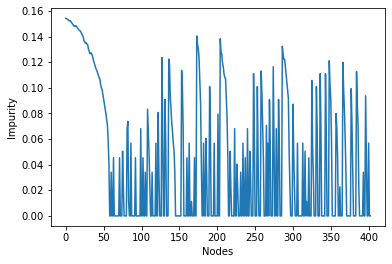

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a line graph showing all attainable attribute values during the training
plt.plot(dtc.tree_.impurity)
plt.xlabel('Nodes')
plt.ylabel('Impurity')
plt.show()

In [183]:
# Test the model
y_pred = dtc.predict(X_test)
y_pred

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [188]:
from sklearn.metrics import confusion_matrix

# Convert the multilabel-indicator format to a one-dimensional format
y_test = y_test_binary.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)

# Show the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0  0  1  0  0  0  0  0  0]
 [11  0  0  0  1  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  1  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]]


In [189]:
# Show the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.91      0.33        11
           8       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         6
          30       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         2

    accuracy                           0.19        52
   macro avg       0.02      0.08      0.03        52
weighted avg       0.04      0.19      0.07        52



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
# Show the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.19230769230769232


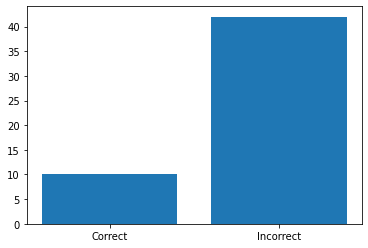

In [191]:
# Plot a bar graph showing the number of correct and incorrect predictions
correct = sum(y_pred == y_test)
incorrect = len(y_pred) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect])
plt.show()

In [192]:
import pickle

In [193]:
# Save the trained model as a pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [194]:
def detect_toxic_comment(comment):
    with open('trained_model.pkl', 'rb') as f:
        dtc = pickle.load(f)
    comment_length = len(comment)
    word_count = len(comment.split())
    prediction = dtc.predict([[comment_length, word_count]])
    return prediction[0]

In [196]:
#comment = 'ഇത് ഒരു മികച്ച ലേഖനം ആണ്'
#prediction = detect_toxic_comment(comment)
#print(prediction)

### References

https://www.analyticsvidhya.com/blog/2022/08/step-by-step-explanation-of-text-classification/
https://www.bing.com/ck/a?!&&p=a236b4856f5ce05aJmltdHM9MTY4Mjk4NTYwMCZpZ3VpZD0xYjJjMjdmOC03YTkzLTYzY2EtMzk0NC0zNGZjN2IzNTYyMjMmaW5zaWQ9NTE5NA&ptn=3&hsh=3&fclid=1b2c27f8-7a93-63ca-3944-34fc7b356223&psq=text+classification+towards+datascience&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3RhZ2dlZC90ZXh0LWNsYXNzaWZpY2F0aW9u&ntb=1
https://www.bing.com/ck/a?!&&p=9aebf49d40238b83JmltdHM9MTY4Mjk4NTYwMCZpZ3VpZD0xYjJjMjdmOC03YTkzLTYzY2EtMzk0NC0zNGZjN2IzNTYyMjMmaW5zaWQ9NTIyMw&ptn=3&hsh=3&fclid=1b2c27f8-7a93-63ca-3944-34fc7b356223&psq=text+classification+towards+datascience&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3RleHQtY2xhc3NpZmljYXRpb24td2l0aC1ubHAtdGYtaWRmLXZzLXdvcmQydmVjLXZzLWJlcnQtNDFmZjg2OGQxNzk0&ntb=1
